In [4]:
import numpy as np
import pandas as pd


import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from skimage import measure, io
from skimage.filters import threshold_otsu, sobel
# from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line, rotate)
from skimage.feature import canny
from skimage.morphology import binary_dilation
from scipy.stats import mode
import math
import sys
from scipy import misc



original shape: (512, 512)


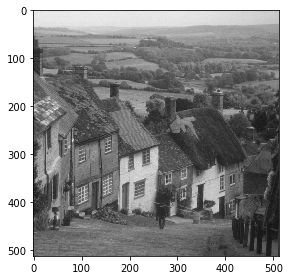

scaled shape: [1126 1126]


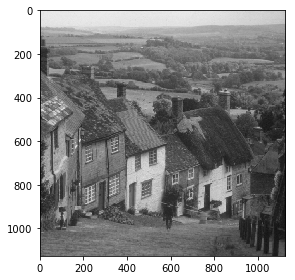

In [120]:
files = [
    'baboon.png',
    'butterfly.png',
    'city.png',
    'house.png',
    'seagull.png',
]

scale = 2.2
f = files[2]
original_img = misc.imread(f)
print("original shape:", original_img.shape)
io.imshow(original_img)
plt.show()


scaled_shape = np.floor(np.multiply(original_img.shape, scale)).astype(int)
print("scaled shape:", scaled_shape)
scaled_img = np.zeros(scaled_shape)

# scale
indexes = np.indices(scaled_shape)
indexes = np.round(indexes / scale).astype(int)

# interpolation
scaled_img = original_img[indexes[0], indexes[1]]

# save scaled image
io.imsave('scaled1.' + f, scaled_img)
io.imshow(scaled_img)
plt.show()


In [39]:
original_img.shape 



(512, 512)

original shape: (512, 512)


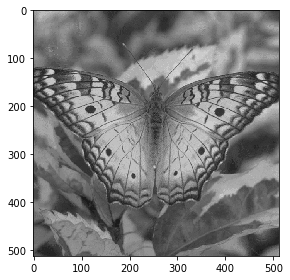

scaled shape: [256 256]


/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: scaled2.butterfly.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


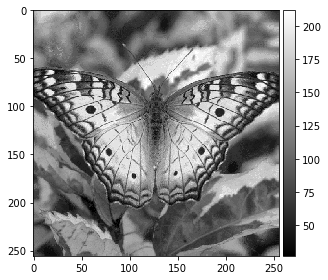

In [66]:
scale = 0.5
f = files[1]
original_img = misc.imread(f)
print("original shape:", original_img.shape)
io.imshow(original_img)
plt.show()

scaled_shape = np.floor(np.multiply(original_img.shape, scale)).astype(int)
print("scaled shape:", scaled_shape)
scaled_img = np.zeros(scaled_shape)

# scale
indexes = np.indices(scaled_shape)
indexes[0] = np.clip(indexes[0], 0, scaled_shape[0] - 2)
indexes[1] = np.clip(indexes[1], 0, scaled_shape[1] - 2)
indexes = np.floor(indexes / scale).astype(int)
dx_dy = (indexes / scale) - np.floor(indexes / scale)
# x_indexes = indexes[0].flatten()
# y_indexes = indexes[1].flatten()
term1 = (1 - dx_dy[0]) * (1 - dx_dy[1]) * original_img[indexes[0], indexes[1]]
term2 = (dx_dy[0]) * (1 - dx_dy[1]) * original_img[indexes[0] + 1, indexes[1]]
term3 = (1 - dx_dy[0]) * (dx_dy[1]) * original_img[indexes[0], indexes[1] + 1]
term4 = (dx_dy[0]) * (dx_dy[1]) * original_img[indexes[0] + 1, indexes[1] + 1]

#TODO: treat range of gray color
scaled_img = np.round(term1 + term2 + term3 + term4).astype(int)
io.imsave('scaled2.' + f, scaled_img, cmap='gray')
io.imshow(scaled_img, cmap='gray')
plt.show()

original shape: (512, 512)
scaled shape: [1000 1000]
26
211


/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: scaled3.butterfly.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


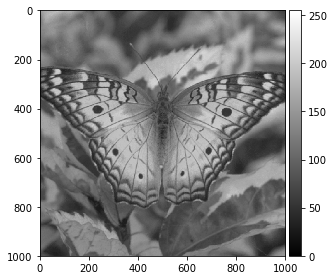

In [105]:
def R_function(s):
    return ((np.maximum(s + 2, 0)** 3) - 4*(np.maximum(s + 1, 0)**3) + 6*(np.maximum(s, 0)**3) - 4*(np.maximum(s - 1, 0)**3)) / 6

scale = 1.955
f = files[1]
original_img = misc.imread(f)
print("original shape:", original_img.shape)

scaled_shape = np.floor(np.multiply(original_img.shape, scale)).astype(int)
print("scaled shape:", scaled_shape)
scaled_img = np.zeros(scaled_shape)

# scale
indexes = np.indices(scaled_shape)
indexes[0] = np.clip(indexes[0], 0, scaled_shape[0] - 1)
indexes[1] = np.clip(indexes[1], 0, scaled_shape[1] - 1)
indexes = np.floor(indexes / scale).astype(int)
dx_dy = (indexes / scale) - np.floor(indexes / scale)

for m in range(-1, 3):
    for n in range(-1, 3):
        dx = dx_dy[0]
        dy = dx_dy[1]
        r2 = R_function(m - dx)
        r1 = R_function(dy - n)
        x_indexes = np.clip(indexes[0] + m, 0, original_img.shape[0] - 1)
        y_indexes = np.clip(indexes[1] + n, 0, original_img.shape[1] - 1)
        scaled_img = scaled_img + (r1*r2*original_img[x_indexes, y_indexes])

scaled_img = scaled_img.astype(int)
print(np.amin(scaled_img))
print(np.amax(scaled_img))
io.imsave('scaled3.' + f, scaled_img, cmap='gray', vmin=0, vmax=255)
io.imshow(scaled_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Scaled image
scaled shape: [1000 1000]


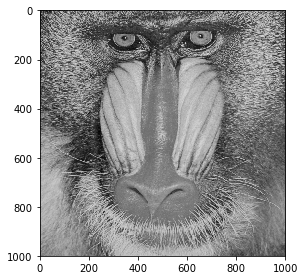

Rotated image


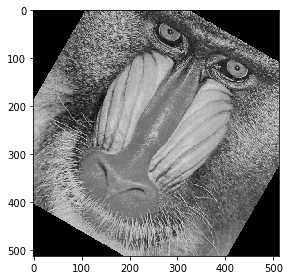

Scaled image
scaled shape: [1000 1000]


/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: scaled.baboon.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


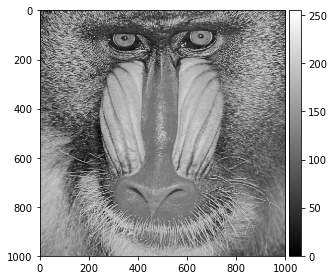

Rotated image


/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rotated.baboon.png is a low contrast image
  warn('%s is a low contrast image' % fname)


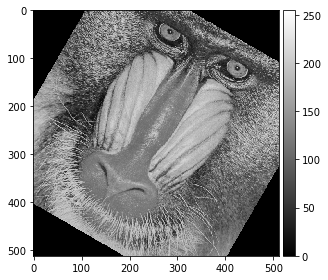

Scaled image
scaled shape: [1000 1000]


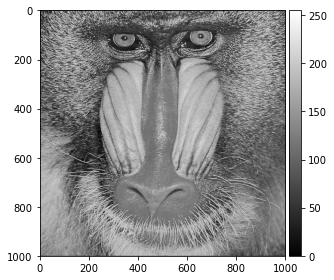

Rotated image


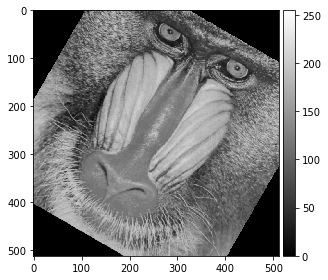

Scaled image
scaled shape: [1000 1000]


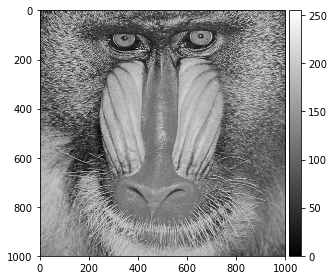

Rotated image


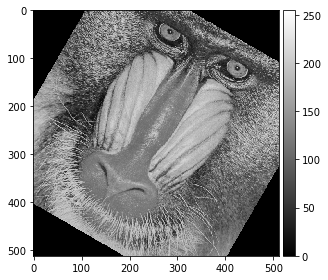

In [105]:
def calculate_dx_dy(indexes):
    dx_dy = indexes - np.floor(indexes)
    return dx_dy[0], dx_dy[1]

def L_function(n, dx, dy, x, y, original_img):
    width = original_img.shape[0] - 1
    height = original_img.shape[1] - 1
    y = np.clip(y + n - 2, 0, height) # y + n - 2 
    l = (-dx * (dx-1) * (dx-2) * original_img[np.clip(x - 1, 0, width), y])/6
    l += ((dx+1) * (dx-1) * (dx-2) * original_img[x, y])/2
    l += (-dx * (dx+1) * (dx-2) * original_img[np.clip(x + 1, 0, width), y])/2
    l += (dx * (dx+1) * (dx-1) * original_img[np.clip(x + 2, 0, width), y])/6
    return l

def interpolate_lagrange(indexes, original_img):
    dx, dy = calculate_dx_dy(indexes)
    x = np.floor(indexes[0]).astype(int)
    y = np.floor(indexes[1]).astype(int)
    scaled_img = (-dy * (dy - 1) * (dy - 2) * L_function(1, dx, dy, x, y, original_img))/6
    scaled_img += ((dy+1) * (dy - 1) * (dy - 2) * L_function(2, dx, dy, x, y, original_img))/2
    scaled_img += (-dy * (dy + 1) * (dy - 2) * L_function(3, dx, dy, x, y, original_img))/2
    scaled_img += (dy * (dy + 1) * (dy - 1) * L_function(4, dx, dy, x, y, original_img))/6 
    return scaled_img.astype(int)


def R_function(s):
    return ((np.maximum(s + 2, 0)** 3) - 4*(np.maximum(s + 1, 0)**3) + 6*(np.maximum(s, 0)**3) - 4*(np.maximum(s - 1, 0)**3)) / 6


def interpolate_bicubic(indexes, original_img):
    dx, dy = calculate_dx_dy(indexes)
    scaled_img = np.zeros(dx.shape)
    width = original_img.shape[0] - 1
    height = original_img.shape[1] - 1
    
    for m in range(-1, 3):
        for n in range(-1, 3):
            r2 = R_function(m - dx)
            r1 = R_function(dy - n)
            x = np.floor(indexes[0]).astype(int)
            y = np.floor(indexes[1]).astype(int)              
            x = np.clip(x + m, 0, width)
            y = np.clip(y + n, 0, height)
            scaled_img += r1*r2*original_img[x, y]
        
    return scaled_img.astype(int)


def interpolate_bilinear(indexes, original_img):
    width = original_img.shape[0] - 1
    height = original_img.shape[1] - 1
    
    dx, dy = calculate_dx_dy(indexes)
    scaled_img = np.zeros(dx.shape)
    x = np.floor(indexes[0]).astype(int)
    y = np.floor(indexes[1]).astype(int)    
    
    scaled_img += (1 - dx) * (1 - dy) * original_img[np.clip(x, 0, width), np.clip(y, 0, width)]
    scaled_img += dx * (1 - dy) * original_img[np.clip(x + 1, 0, width), np.clip(y, 0, width)]
    scaled_img += (1 - dx) * dy * original_img[np.clip(x, 0, width), np.clip(y + 1, 0, width)]
    scaled_img += dx * dy * original_img[np.clip(x + 1, 0, width), np.clip(y + 1, 0, width)]
    
    return scaled_img.astype(int)

def interpolate_nn(indexes, original_img):
    indexes = np.round(indexes).astype(int)
    return original_img[indexes[0], indexes[1]]
    

def scale_image(method, original_img, scale):
    scaled_shape = np.floor(np.multiply(original_img.shape, scale)).astype(int)
    print("scaled shape:", scaled_shape)
    scaled_img = np.zeros(scaled_shape)

    # scale
    indexes = np.indices(scaled_shape)
    indexes = indexes/scale
    dx, dy = calculate_dx_dy(indexes)
#     indexes = np.floor(indexes / scale).astype(int)
#     dx_dy = (indexes / scale) - np.floor(indexes / scale)
#     dx = dx_dy[0]
#     dy = dx_dy[1]

    if method == 4:
        return interpolate_lagrange(indexes, original_img)
    elif method == 3:
        return interpolate_bicubic(indexes, original_img)
    elif method == 2:
        return interpolate_bilinear(indexes, original_img)
    else:
        return interpolate_nn(indexes, original_img)

def rotate_image(method, original_img, theta):
    '''
    theta in degrees
    '''
    theta = np.deg2rad(theta)
    indexes = np.indices(original_img.shape)

    x = indexes[0]
    y = indexes[1]
    w = original_img.shape[0]
    h = original_img.shape[1]
    x_ = (x * math.cos(theta)) - (y * math.sin(theta))
    y_ = (x * math.sin(theta)) + (y * math.cos(theta))

    # calculate offset to center the image
    center_x = ((w/2) * math.cos(theta)) - ((h/2) * math.sin(theta))
    center_y = ((w/2) * math.sin(theta)) + ((h/2) * math.cos(theta))
    offset_x = (w/2) - center_x
    offset_y = (h/2) - center_y
    
    # center image
    x_ += offset_x
    y_ += offset_y
    
    # clip to values in image range
    x = np.clip(x_, 0, w - 1).round().astype(int)
    y = np.clip(y_, 0, h - 1).round().astype(int)

    # filter out invalid coordinates (out of bounds)
    filter_invalid_coordinates = np.logical_or(
        np.logical_or(x_ > w - 1, y_ > h - 1),
        np.logical_or(x_ < 0, y_ < 0)
    )
    
    # calculate dx and dy
    indexes[0] = x
    indexes[1] = y
    
    if method == 4:
        rotated_img = interpolate_lagrange(indexes, original_img)
    elif method == 3:
        rotated_img =  interpolate_bicubic(indexes, original_img)
    elif method == 2:
        rotated_img =  interpolate_bilinear(indexes, original_img)
    else:
        rotated_img =  interpolate_nn(indexes, original_img)    
    
    # paint areas out of image range as black
    rotated_img[filter_invalid_coordinates] = 0
    return rotated_img


def main():
    scale = 1.955
    
    f = 'baboon.png'
    original_img = misc.imread(f)
    
    for method in range(1,5):    
        print("Scaled image")
        scaled_img = scale_image(method, original_img, scale)
        io.imsave('scaled.' + f, scaled_img, cmap='gray', vmin=0, vmax=255)
        io.imshow(scaled_img, cmap='gray', vmin=0, vmax=255)
        plt.show()

        print("Rotated image")
        rotated_img = rotate_image(method, original_img, 30)
        io.imsave('rotated.' + f, rotated_img, cmap='gray', vmin=0, vmax=255)
        io.imshow(rotated_img, cmap='gray', vmin=0, vmax=255)
        plt.show()
    
main()

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
offset_center_x: 102.99584577017862
offset_center_y: -72.11846761256373
False
False
False
False
32814


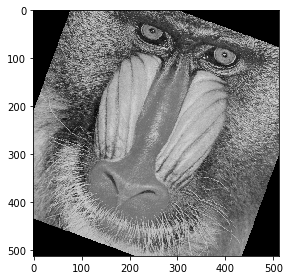

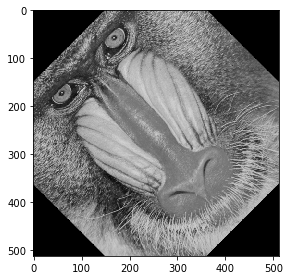

In [75]:
# Rotate

# theta in radians
def my_rotate(original_img, theta):
    indexes = np.indices(original_img.shape)
#     indexes = np.indices(np.multiply(2, original_img.shape))

    x = indexes[0]
    y = indexes[1]
    w = original_img.shape[0]
    h = original_img.shape[1]
    x_ = (x * math.cos(theta)) - (y * math.sin(theta))
    y_ = (x * math.sin(theta)) + (y * math.cos(theta))

#     print(indexes[0] >= 0 * indexes[1] >= 0)
    print(indexes[1] >= 0)

#     print("filter_valid_coordinates shape:", filter_valid_coordinates.shape)
#     indexes = indexes[filter_valid_coordinates]

    
    center_x = ((w/2) * math.cos(theta)) - ((h/2) * math.sin(theta))
    center_y = ((w/2) * math.sin(theta)) + ((h/2) * math.cos(theta))
    offset_x = (w/2) - center_x
    offset_y = (h/2) - center_y
    print("offset_center_x:", offset_x)
    print("offset_center_y:", offset_y)
    
    x_ += offset_x
    y_ += offset_y
    
    x = np.clip(x_, 0, w - 1).round().astype(int)
    y = np.clip(y_, 0, h - 1).round().astype(int)
    
#     x = np.round(x).astype(int)
#     y = np.round(y).astype(int)
    
    # filter valid coordinates
    filter_invalid_coordinates = np.logical_or(
        np.logical_or(x_ > w-1, y_ > h-1),
        np.logical_or(x_ < 0, y_ < 0)
    )
    print(np.any(x > w))
    print(np.any(y > h))
    print(np.any(x < 0))
    print(np.any(y < 0))
    
    # interpolation
    scaled_img = original_img[x, y]
    print(np.sum(filter_invalid_coordinates))
    scaled_img[filter_invalid_coordinates] = 0
    
    # save scaled image
#     io.imsave('rotated1.', scaled_img)
    io.imshow(scaled_img)
    plt.show()

original_img = misc.imread('baboon.png')
my_rotate(original_img, math.pi/9)

import skimage
io.imshow(skimage.transform.rotate(original_img, 45))
plt.show()

In [70]:
a = np.random(1)

TypeError: 'module' object is not callable

In [22]:
y_indexes.shape

(1267876,)

In [60]:
np.indices((2, 3))[1]

array([[0, 1, 2],
       [0, 1, 2]])